In [1]:

import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D
import sys
from sklearn.preprocessing import StandardScaler
from sdv.demo import load_tabular_demo
from sdv.tabular import CTGAN
from sdv.evaluation import evaluate
np.set_printoptions(threshold=sys.maxsize)

In [2]:
pwd

'C:\\Users\\zheng\\Desktop\\MUSA 650 RS\\429\\musa650-final\\script'

In [3]:
data_raw= pd.read_csv('..\\rawdata\\landslide3.csv')
data_raw.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,curv_plan,curv_prof,aspect,curv,ID
0,R,14.0,8.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,-9999.000,-9999.0,0
1,R,13.0,6.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,-9999.000,-9999.0,1
2,R,15.0,13.5,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,295.115,-9999.0,2
3,R,18.0,10.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,150.945,-9999.0,3
4,R,17.0,10.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,133.977,-9999.0,4


#### data process


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLASS', ylabel='count'>

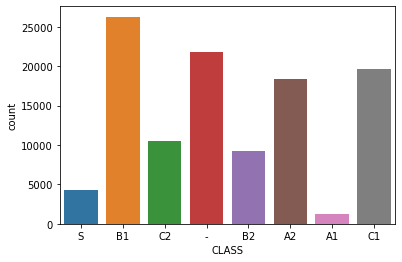

In [5]:
#lot of '-' meaning uncategorized landslide
sns.countplot(data_raw['CLASS'] )

In [6]:
#todo: nothing to change here, we select 10000 data randomly
data=data_raw.sample(n=10000)

In [7]:
data.shape

(10000, 16)

C:\Users\zheng\AppData\Local\Temp/ipykernel_11876/1970437344.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['history']=2022-data1['YEAR_1']
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLIDE_TYPE', ylabel='count'>

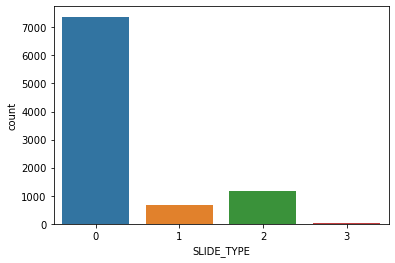

In [16]:
data1=data[~data['SLOPE'].isin([9999])]
data1=data[~data['HEADELEV'].isin([9999])]
data1=data[~data['TAILELEV'].isin([9999])]

#newly added data: curv_plan, curv_prof, aspect, curv
data1=data[~data['curv_plan'].isin([-9999])]
data1=data[~data['curv_prof'].isin([-9999])]
data1=data[~data['aspect'].isin([-9999])]
data1=data[~data['curv'].isin([-9999])]

data1['history']=2022-data1['YEAR_1']
data1=data1.drop(['YEAR_1','CLASS','ID'], axis=1)
#remove class
data2 = pd.get_dummies(data1, columns=['COVER','GULLY'])
#Y variable: SLIDE_TYPE
def slide_type(slide_type1):
    if slide_type1 == 'R':
        return 0
    elif slide_type1 == 'C':
        return 1
    elif slide_type1 == 'O':
        return 2
    else :
        return 3
    
data2['SLIDE_TYPE'] = data2['SLIDE_TYPE'].apply(slide_type)

sns.countplot(data2['SLIDE_TYPE'] )

In [17]:
data2.shape

(9219, 18)

In [18]:
data2.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,curv_plan,curv_prof,aspect,curv,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y
71186,0,11.0,10.0,31.0,224.0,214.0,10.0,-0.201817,0.068477,145.977,-0.270293,59,0,0,1,0,1,0
43783,0,9.0,7.5,38.5,233.0,226.0,7.0,-0.074547,0.171174,333.435,-0.245721,59,0,0,1,0,1,0
65081,0,13.5,14.0,26.5,86.0,77.0,9.0,0.033923,0.009350,330.607,0.024572,59,0,0,1,0,1,0
69035,0,7.0,12.5,40.5,142.0,134.0,8.0,0.583482,-0.055393,199.330,0.638875,59,0,0,0,1,1,0
75362,0,11.0,11.0,31.0,188.0,181.0,7.0,0.116781,-0.067510,216.754,0.184291,59,0,0,0,1,1,0


In [19]:
col= data2.columns[pd.np.r_[1:18]]
x = np.array(data2[col])
y=np.array(data2['SLIDE_TYPE'])
# collect data with train data:test data is 3:7
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify = y, random_state = 4)


C:\Users\zheng\AppData\Local\Temp/ipykernel_11876/3010493044.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  col= data2.columns[pd.np.r_[1:18]]


In [20]:
print(y.shape)
print(x.shape)
print(X_train.shape)
print(y_train.shape)

(9219,)
(9219, 17)
(6453, 17)
(6453,)


In [21]:
y_train[:5]

array([0, 0, 0, 2, 0], dtype=int64)

In [22]:
X_train[:5,:]

array([[ 6.50000e+00,  1.15000e+01,  4.55000e+01,  1.72000e+02,
         1.64000e+02,  8.00000e+00, -1.19458e-01,  3.22840e-01,
         3.97529e+01, -4.42298e-01,  5.90000e+01,  0.00000e+00,
         0.00000e+00,  1.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00],
       [ 9.00000e+00,  6.00000e+00,  5.85000e+01,  1.39000e+02,
         1.34000e+02,  5.00000e+00,  1.15393e-01,  2.93904e-02,
         3.38378e+02,  8.60024e-02,  5.90000e+01,  0.00000e+00,
         0.00000e+00,  1.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00],
       [ 1.90000e+01,  1.25000e+01,  4.30000e+01,  3.87000e+02,
         3.76000e+02,  1.10000e+01,  3.33842e-02, -1.38621e-01,
         2.33842e+02,  1.72005e-01,  5.90000e+01,  0.00000e+00,
         0.00000e+00,  1.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00],
       [ 5.00000e+00,  7.00000e+00,  3.55000e+01,  2.86000e+02,
         2.72000e+02,  1.40000e+01,  1.44685e-01,  2.18243e-02,
         2.92635e+02,  1.22861e-01,

### changes of data processing

In [24]:
# the input of gan in svd package is df, here convert the numpy into df
original_train=np.concatenate((y_train.reshape(-1,1),X_train),axis=1)
train_data=pd.DataFrame(data=original_train,columns=data2.columns[pd.np.r_[:18]])
train_data.head()


C:\Users\zheng\AppData\Local\Temp/ipykernel_11876/2506634044.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  train_data=pd.DataFrame(data=original_train,columns=data2.columns[pd.np.r_[:18]])


,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,curv_plan,curv_prof,aspect,curv,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y
0,0.0,6.5,11.5,45.5,172.0,164.0,8.0,-0.119458,0.322840,39.7529,-0.442298,59.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,9.0,6.0,58.5,139.0,134.0,5.0,0.115393,0.029390,338.3780,0.086002,59.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,19.0,12.5,43.0,387.0,376.0,11.0,0.033384,-0.138621,233.8420,0.172005,59.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2.0,5.0,7.0,35.5,286.0,272.0,14.0,0.144685,0.021824,292.6350,0.122861,77.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,14.0,7.0,28.5,233.0,228.0,5.0,0.337682,-0.411767,124.2320,0.749450,59.0,0.0,0.0,1.0,0.0,1.0,0.0


# code below: train each label respectively

In [25]:
#filter train by label 0,1,2,
train_data_0=train_data.loc[train_data['SLIDE_TYPE']==0]
train_data_0

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,curv_plan,curv_prof,aspect,curv,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y
0,0.0,6.5,11.5,45.5,172.0,164.0,8.0,-0.119458,0.322840,39.7529,-0.442298,59.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,9.0,6.0,58.5,139.0,134.0,5.0,0.115393,0.029390,338.3780,0.086002,59.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,19.0,12.5,43.0,387.0,376.0,11.0,0.033384,-0.138621,233.8420,0.172005,59.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,14.0,7.0,28.5,233.0,228.0,5.0,0.337682,-0.411767,124.2320,0.749450,59.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,8.0,7.5,47.0,387.0,380.0,7.0,0.377771,-0.199674,229.8110,0.577445,59.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6446,0.0,13.0,7.0,29.5,403.0,399.0,4.0,-0.040897,-0.090042,352.0400,0.049144,59.0,0.0,0.0,1.0,0.0,1.0,0.0
6447,0.0,20.0,7.0,55.0,330.0,320.0,10.0,-0.015939,-0.028225,333.0200,0.012286,59.0,0.0,0.0,1.0,0.0,1.0,0.0
6448,0.0,11.0,8.0,37.5,100.0,95.0,5.0,-0.033418,0.064870,275.8560,-0.098289,59.0,0.0,0.0,0.0,1.0,0.0,1.0
6450,0.0,10.0,6.5,44.5,249.0,240.0,9.0,-0.060109,0.001321,271.4770,-0.061430,59.0,0.0,0.0,0.0,1.0,1.0,0.0


In [26]:
train_data_1=train_data.loc[train_data['SLIDE_TYPE']==1]
train_data_2=train_data.loc[train_data['SLIDE_TYPE']==2]
train_data_3=train_data.loc[train_data['SLIDE_TYPE']==3]

In [27]:
model0 = CTGAN(cuda=True)
model0.fit(train_data_0)

model1 = CTGAN(cuda=True)
model1.fit(train_data_1)

model2 = CTGAN(cuda=True)
model2.fit(train_data_2)

model3 = CTGAN(cuda=True)
model3.fit(train_data_3)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check f

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or ch

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or ch

In [29]:
#save model
model0.save('new_trial\\my_model0.pkl')
model1.save('new_trial\\my_model1.pkl')
model2.save('new_trial\\my_model2.pkl')
model3.save('new_trial\\my_model3.pkl')

In [30]:
#load model
loaded0 = CTGAN.load('new_trial\\my_model0.pkl')
loaded1 = CTGAN.load('new_trial\\my_model1.pkl')
loaded2 = CTGAN.load('new_trial\\my_model2.pkl')
loaded3 = CTGAN.load('new_trial\\my_model3.pkl')

In [32]:

# generate new data, the original data: new data = 1:1 
new_data0 = loaded0.sample(num_rows=6712)
new_data1 = loaded1.sample(num_rows=6712)
new_data2 = loaded2.sample(num_rows=6712)
new_data3 = loaded3.sample(num_rows=6712)

#merge the new data
new_data=pd.concat(
    [new_data0, new_data1,new_data2,new_data3],
    axis=0,
)

In [33]:
new_data.shape

(26848, 18)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLIDE_TYPE', ylabel='count'>

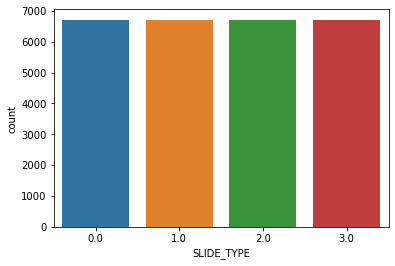

In [34]:
#plot the data distribution
sns.countplot(new_data['SLIDE_TYPE'] )

In [35]:
evaluate(new_data, train_data)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.38230879814343305

In [ ]:
# new train data: the mixture of original and generative data
new_train=pd.concat(
    [new_data, train_data],
    axis=0,
)
print(new_train.shape)
new_train.head()

(13422, 20)


,SLIDE_TYPE,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y,CLASS_-,CLASS_A1,CLASS_A2,CLASS_B1,CLASS_B2,CLASS_C1,CLASS_C2,CLASS_S
0,0.0,34.5,38.0,0.0,5.5,59.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,47.7,28.0,145.4,9.0,59.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,57.2,208.0,737.6,3.7,59.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.0,46.4,240.0,380.1,26.2,59.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,44.3,64.0,16.2,1.0,59.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#save new created train data
new_train.to_csv('../save_data/new_train_03.csv')

#shuffle data
new_train_data = new_train.sample(frac=1).reset_index(drop=True)

# convert df to numpy for training input 
new_train_X=new_train_data.iloc[:,1:].values
new_train_Y_1=new_train_data.iloc[:,0:1].values
new_train_Y=np.squeeze(new_train_Y_1)

In [ ]:
print(new_train_X.shape)
print(X_test.shape)
print(new_train_Y.shape)
print(y_test.shape)

(13422, 19)
(2877, 19)
(13422,)
(2877,)


In [ ]:
# We need to do feature scaling first.
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
new_train = sc.fit_transform(new_train_X03)
X_test = sc.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# todo: n_jobs=-1, accelerate running speed: https://scikit-learn.org/stable/computing/parallelism.html
model = KNeighborsClassifier(n_jobs=-1)

param_grid = { 
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1)

grid.fit(new_train_X, new_train_Y.ravel())

metric = grid.best_estimator_.metric
n_neighbors = grid.best_estimator_.n_neighbors
weights = grid.best_estimator_.weights

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9310087226324978
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors, weights=weights, n_jobs=-1).fit(new_train_X, new_train_Y.ravel())
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

In [ ]:
knn_conf_mat = confusion_matrix(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
print('k Nearest Neighbors:')
print('Accuracy:',knn_acc)
#print('ROC AUC=%.4f' % (knn_roc_auc))

k Nearest Neighbors:
Accuracy: 0.0024330900243309003


Confusion Matrix:


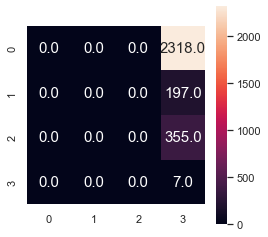

In [ ]:
array = confusion_matrix(y_test, knn_pred)

knn_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(knn_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Confusion Matrix:')
plt.show()

In [ ]:
knn_cls_precision, knn_cls_recall, knn_cls_f1, _ = precision_recall_fscore_support(y_test, knn_pred, average=None, labels=[0,1,2,3])

for i in range(n_class): 
    print(i)
    print('Precision  = %.4f ' % (knn_cls_precision[i]))
    print('Recall on Y label = %.4f ' % (knn_cls_recall[i]))
    print('F1 on Y label = %.4f ' % (knn_cls_f1[i]))
    print('----------------------------')

0
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------
1
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------
2
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------
3
Precision  = 0.0024 
Recall on Y label = 1.0000 
F1 on Y label = 0.0049 
----------------------------


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### GAN Core

In [74]:
model.fit?

In [36]:
# todo(important!): if you have GPU, cuda = True, else cuda = False 
model = CTGAN(cuda=True)

# todo(important!): here we train gan model according to original train_data
# tune the parameter according to ref doc: https://sdv.dev/SDV/user_guides/single_table/ctgan.html
model.fit(train_data)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check f

In [37]:
original_train.shape

(6453, 18)

In [38]:

# todo: nothing needs to change but a reminder: 
# once you decide to use previous model, just load it, you don't need to train it again!

# save gan model 
model.save('new_trial\\my_model.pkl')


In [39]:
# load gan model 
loaded = CTGAN.load('new_trial\\my_model.pkl')

In [40]:
# generate new data, the original data: new data = 1:1 
# todo: you can change the ratio between original data: new data by 'num_rows'
new_data = loaded.sample(num_rows=train_data.shape[0])

In [41]:
new_data.shape

(6453, 18)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLIDE_TYPE', ylabel='count'>

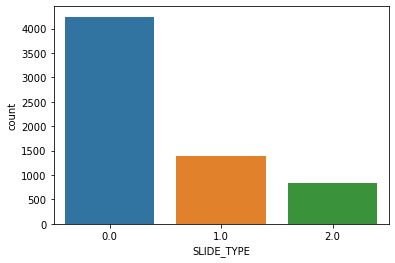

In [42]:
# label ditribution in sythetic data
# filter 
# todo(important!): nothing need to change, but remember to tune the parameter according to the this plot
sns.countplot(new_data['SLIDE_TYPE'] )


In [61]:
# todo(important!): understand the evaluation metric and add it to report 
# and use other metrics with doc below to evaluate and figure out what is wrong with new data
# ref doc: https://sdv.dev/SDV/user_guides/evaluation/index.html#evaluation
evaluate(new_data, train_data)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.5731210564151478

In [45]:
# new train data: the mixture of original and generative data
new_train=pd.concat(
    [new_data, train_data],
    axis=0,
)
print(new_train.shape)
new_train.head()

(12906, 18)


,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,curv_plan,curv_prof,aspect,curv,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y
0,0.0,17.8,7.8,61.025344,692.677491,421.730717,16.050388,0.004915,0.091857,26.735930,0.497748,59.0,0.0,1.0,1.0,0.0,1.0,0.0
1,2.0,11.6,5.3,16.630802,117.188983,149.968784,6.278275,-0.155821,-0.016130,196.123182,-0.175939,55.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,22.2,7.8,38.313125,180.857527,82.620924,2.000000,-0.398600,-0.161451,101.155057,-0.247440,59.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,17.1,12.7,29.989789,60.524902,154.734649,2.000000,0.046851,0.003470,-9999.000000,-0.020205,59.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,26.4,12.2,25.038897,278.352162,247.809884,5.106744,-0.108352,0.098810,93.976942,0.139285,59.0,0.0,0.0,1.0,0.0,0.0,1.0


In [49]:
# todo: nothing needs to change, but you can read the data directly next time
new_train.to_csv('../save_data/new_train1.csv')

In [50]:
#shuffle data
new_train_data = new_train.sample(frac=1).reset_index(drop=True)


In [51]:
# convert df to numpy for training input 
new_train_X=new_train_data.iloc[:,1:].values
new_train_Y_1=new_train_data.iloc[:,0:1].values
new_train_Y=np.squeeze(new_train_Y_1)

In [52]:
print(new_train_X.shape)
print(X_test.shape)
print(new_train_Y.shape)
print(y_test.shape)

(12906, 17)
(2766, 17)
(12906,)
(2766,)


In [53]:
# We need to do feature scaling first.
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
new_train = sc.fit_transform(new_train_X)
X_test = sc.fit_transform(X_test)

### 1. KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# todo: n_jobs=-1, accelerate running speed: https://scikit-learn.org/stable/computing/parallelism.html
model = KNeighborsClassifier(n_jobs=-1)

param_grid = { 
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1)

grid.fit(new_train_X, new_train_Y.ravel())

metric = grid.best_estimator_.metric
n_neighbors = grid.best_estimator_.n_neighbors
weights = grid.best_estimator_.weights

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.8092358776268572
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [55]:
knn = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors, weights=weights, n_jobs=8).fit(new_train_X, new_train_Y.ravel())
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

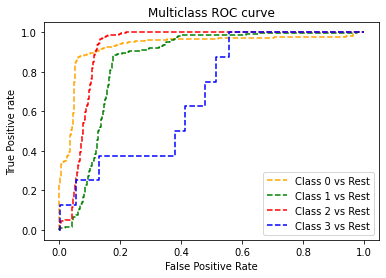

In [56]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, knn_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

In [57]:
knn_cls_precision, knn_cls_recall, knn_cls_f1, _ = precision_recall_fscore_support(y_test, knn_pred, average=None, labels=[0,1,2,3])

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
knn_conf_mat = confusion_matrix(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
print('k Nearest Neighbors:')
print('Accuracy:',knn_acc)
#print('ROC AUC=%.4f' % (knn_roc_auc))

k Nearest Neighbors:
Accuracy: 0.8004338394793926


Confusion Matrix:


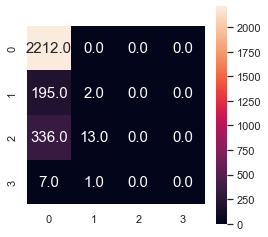

In [59]:
array = confusion_matrix(y_test, knn_pred)

knn_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(knn_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Confusion Matrix:')
plt.show()

In [60]:
for i in range(n_class): 
    print(i)
    print('Precision  = %.4f ' % (knn_cls_precision[i]))
    print('Recall on Y label = %.4f ' % (knn_cls_recall[i]))
    print('F1 on Y label = %.4f ' % (knn_cls_f1[i]))
    print('----------------------------')

0
Precision  = 0.8044 
Recall on Y label = 1.0000 
F1 on Y label = 0.8916 
----------------------------
1
Precision  = 0.1250 
Recall on Y label = 0.0102 
F1 on Y label = 0.0188 
----------------------------
2
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------
3
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------


## 2. Random Forest

In [62]:
model = RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,30,2),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(new_train_X, new_train_Y.ravel())

n_estimators = grid.best_estimator_.n_estimators
criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.8721522740661888
Best hyperparameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 300}


In [63]:
rf = RandomForestClassifier(random_state=0, criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators = n_estimators).fit(new_train_X, new_train_Y.ravel())

In [64]:
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)

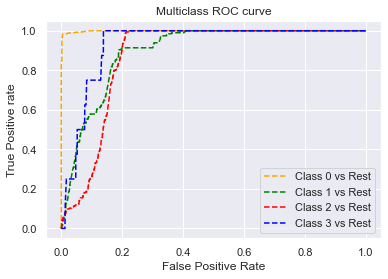

In [65]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, rf_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

In [66]:
rf_cls_precision, rf_cls_recall, rf_cls_f1, _ = precision_recall_fscore_support(y_test, rf_pred, average=None, labels=[0,1,2,3])

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
rf_conf_mat = confusion_matrix(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
print('Random Forest:')
print('Accuracy:',rf_acc)

Random Forest:
Accuracy: 0.7660882140274765


Confusion Matrix:


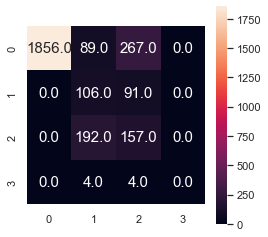

In [69]:
array = confusion_matrix(y_test, rf_pred)

rf_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(rf_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Confusion Matrix:')
plt.show()